In [2]:
import numpy as np
import os
import segyio

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, traceimage

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
snappath = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/UTAH_Homo_multi/outputs/snap'
seispath = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/UTAH_Homo_multi/outputs/su'
expname = 'UTAH_Homo_tst'

# PARAMETERS TO BE DEFINED

In [3]:
nr = 210
n_xzy = [170, 150, 174]
nbounds = 30
snap_sbsmp_xyz = 1

# READ SNAPS

In [4]:
def read_snap(snap_file, modshape, snap_sbsmp=1, nbounds=0., freesurface=False):
    '''modshape = [nx,ny,nz]
    '''
    # Read in snaps file
    snaps_1d = np.fromfile(snap_file, dtype='<f')

    # Get snap dimensions
    snap_nx = int(modshape[0] / snap_sbsmp)
    snap_ny = int(modshape[1] / snap_sbsmp)
    snap_nz = int(modshape[2] / snap_sbsmp)
    nsnaps = int(snaps_1d.shape[0] / (snap_nx * snap_ny * snap_nz))

    snaps_4d = snaps_1d.reshape([nsnaps, snap_nz, snap_nx, snap_ny, ])
    snaps_4d = np.transpose(snaps_4d, [0, 3, 1, 2])

    if np.float64(nbounds) == 0.:
        return snaps_4d
    else:
        bounds_shift = int(nbounds / snap_sbsmp)
        if not freesurface:
            snaps_4d_excbounds = snaps_4d[:,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift]
        else:
            snaps_4d_excbounds = snaps_4d[:,
                                 :-bounds_shift,
                                 bounds_shift:-bounds_shift,
                                 bounds_shift:-bounds_shift]
        return snaps_4d, snaps_4d_excbounds

In [5]:
snap_file = os.path.join(snappath,'UTAH_Homo_tst.bin.vy')

snaps_4d, snaps_4d_excbounds = read_snap(snap_file, 
                                         modshape = n_xzy, 
                                         snap_sbsmp=snap_sbsmp_xyz, 
                                         nbounds=nbounds, 
                                         freesurface=True)

In [6]:
snaps_4d.shape

(502, 150, 174, 170)

In [7]:
np.max(abs(snaps_4d))

4.056684e-09

IndexError: index 520 is out of bounds for axis 0 with size 502

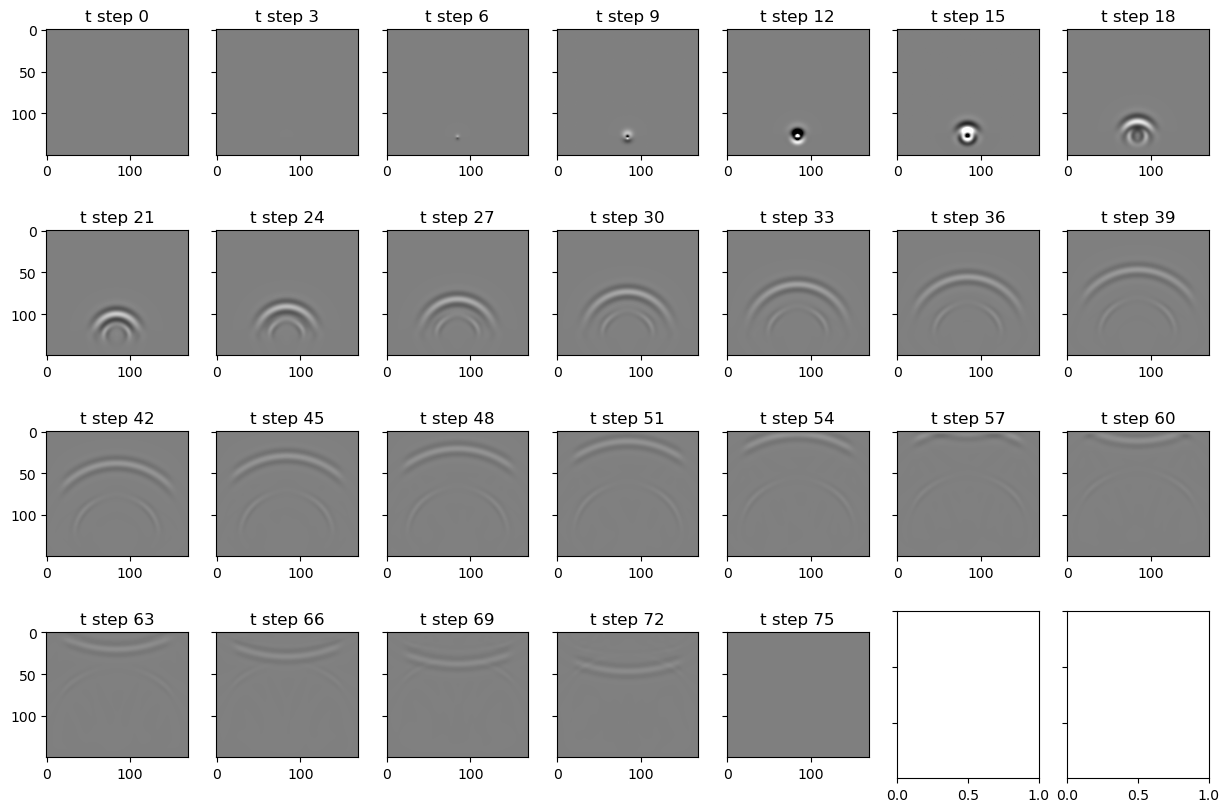

In [8]:
fig,axs = plt.subplots(4,7, figsize=[15,10], sharey=True)
for i,ax in enumerate(axs.ravel()):
    snap = snaps_4d[i*20,:,snaps_4d.shape[2]//2,:]
    ax.imshow(snap/np.max(abs(snaps_4d)),  
                          cmap='binary', vmin=-0.01, vmax=0.01, 
                         )
    ax.set_title('t step %i'%(i*3))
# for ax in axs.ravel(): ax.set_yticks([]); ax.set_xticks([])
plt.tight_layout()

# SEISMOGRAMS

In [3]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [12]:
# p = read_seis(os.path.join(seispath,'%s_div.txt'%expname), nr)
# vx = read_seis(os.path.join(seispath,'%s_vx.txt'%expname), nr)
# vy = read_seis(os.path.join(seispath,'%s_vy.txt'%expname), nr)
# vz = read_seis(os.path.join(seispath,'%s_vz.txt'%expname), nr)

nr=180
seisfile = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/explosive_multishot/UtahFORGE_GriddedRecs/outputs/su/multishot_group00_vz.txt.shot1'
vx = read_seis(seisfile, nr)


/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/pyfrac/visualisation/traceviz.py:26: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()
/tmp/ipykernel_22404/1391604942.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


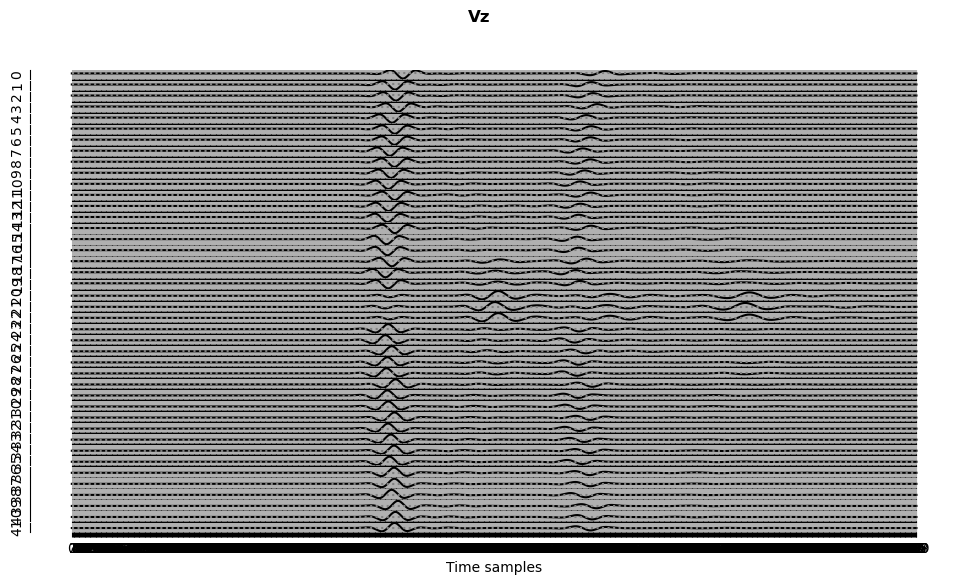

In [11]:
fig,axs = wiggleplot(vz[::5,:1000]);
fig.suptitle('Vz', fontweight='bold')
plt.tight_layout()

<Axes: title={'center': 'Seismic Recording'}, xlabel='Receiver #', ylabel='Time'>

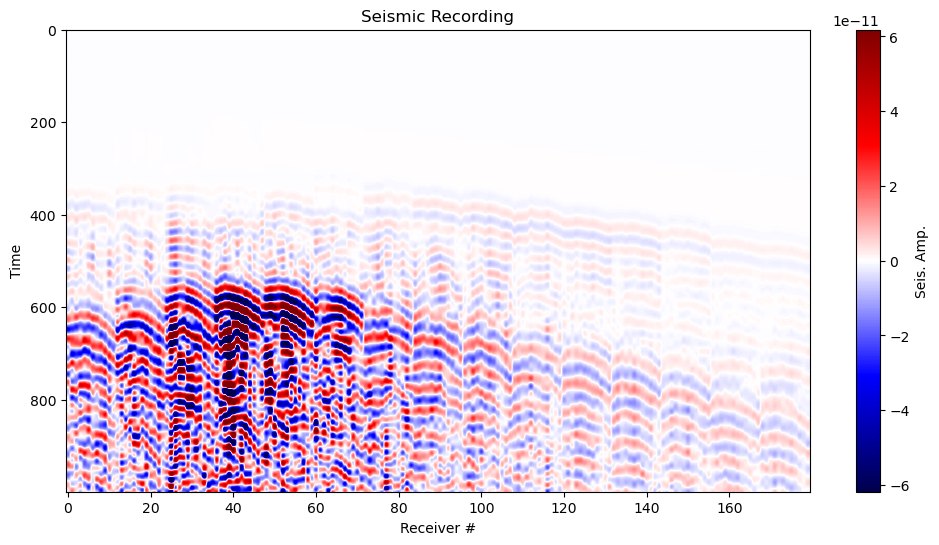

In [13]:
traceimage(vx, climQ=99.)